## Text Analytics -- Case Study: The Big Short  Novel

### Highly Recommended: The graphs/plots in the notebook can be viewed using this link: [nbviewer](https://nbviewer.jupyter.org), because the plotly graphs cannot be viewed in github. 

***(you will need to copy and paste the url of this notebook to the nbviewer link)***

- The aim of this text analytics project is to analyse a storybook or novel through extracting out the characters, their dialogue, words/verbs used them and also to check the locations and time occurences mentioned in the novel.

**Objectives:**

- Extract out the major characters, time occurences and geopolitical locations mentioned in the Novel.
- Extract out the interaction between the top characters if any, i.e. check if two characters appear in the same sentences
- Check the Gender distribution based on the characters in the Novel
- Extract out sentences where characters are the "Subject" and the corresponding "action verbs" used by them



### Steps Ahead:
- Convert PDF Book(.pdf) to Text Format (.txt) 
- Data Cleaning with Regex (Regular Expression)
- Entity Extraction with Spacy
- Data Visualization with Plotly:
    - Character, Geopolitical and Time occurence Visualizations
    - Gender Distribution charts
    - Character's Appearances Visualizations
- Dependency parsing -- to extract sentences where characters are the "Subject" of Sentences
- Character's action visualization


- Tools utilized: ***Spacy, NLTK, Ploty, Seaborn, Regex***
#### ***Note: All the codes are ran from the following python modules: pdf_to_txt.py, bigshort_txtextract.py, gender.py, text_plots.py, subj.py***

In [11]:
import spacy
nlp = spacy.load('en_core_web_lg')
from spacy import displacy

# plotly
from plotly.subplots import make_subplots
import chart_studio.plotly as py
import plotly.graph_objs as go
from plotly import tools
from plotly.offline import init_notebook_mode, iplot
init_notebook_mode(connected=True)
import plotly.express as px

### - Convert PDF to Txt.format

In [11]:
# from pdf_to_txt import pdf_to_text

In [2]:
# pdfDir = r"C:\Users\Adeboye Adeniyi\Documents\filmscripts\pdfscripts/"
# txtDir = r'C:\Users\Adeboye Adeniyi\Documents\filmscripts\textscripts/'


In [3]:
# convert = pdf_to_text(pdfDir, txtDir)

In [4]:
# convert.convertMultiple()

In [4]:
from bigshort_txtextract import text_extract

In [5]:
txt = text_extract('./textscripts/The Big Short BOOK.pdf.txt')

In [6]:
text_data, df_chapter, df_sentences = txt.clean_text()

In [8]:
df_chapter

,Chapters,Contents
0,Prologue Poltergeist,Poltergeist The willingness of a Wall Street...
1,Chapter 1 A Secret Origin Story,A Secret Origin Story Eisman entered finance...
2,Chapter 2 In the Land of the Blind,In the Land of the Blind Writing a check sep...
3,"Chapter 3 ""How Can a Guy Who Can't Sp...","credit officer is going to say, get out of t..."
4,Chapter 4 How to Harvest a Migrant ...,How to Harvest a Migrant Worker They hadnt. ...
5,Chapter 5 Accidental Capitalists,The thing Eisman had found was indeed a gold ...
6,Chapter 6 Spider-Man at The Venetian,SpiderMan at The Venetian Golfing with Eisma...
7,Chapter 7 The Great Treasure Hunt,The Great Treasure Hunt Charlie Ledley and B...
8,Chapter 8 The Long Quiet,"The Long Quiet ""i havent,"" Burry replied, se..."
9,Chapter 9 A Death of Interest,A Death of Interest Howie Hubler had grown u...


In [9]:
person, gpe, time = txt.extract_entities(df_chapter, df_sentences)

### Example of Named Entity Recognition for Chapter 5 of this Novel

In [12]:
print(df_chapter.Chapters[5], '\n')
chpt = nlp(df_chapter.Contents[5])
options = {'ents' : ['PERSON', 'TIME', 'GPE', 'ORG', 'LOC']}#person name, time - datetime, gpe- geopolitical entity, org - organization, loc-location 
displacy.render(chpt, style = 'ent', options = options, jupyter = True)

Chapter 5            Accidental Capitalists 



In [13]:
characters, refined_gpes = txt.remove_similar(person,gpe)

In [14]:
print(characters)

['Charlie', 'Vinny', 'Burry', 'Eisman', 'Danny', 'Jamie', 'Ben', 'Greg Lippmann', 'Steve Eisman', 'Howie Hubler', 'Cdos', 'Steve', 'Lippmann', 'Danny Moses', 'Fp', 'Cdo', 'Vincent Daniel', 'Paulson', 'Ben Hockett', 'Asperger', 'Valerie', 'Aig Fp', 'Joe Cassano', 'Jamie Mai', 'John Paulson', 'Cdss', 'Moses', 'Jamie  ', 'Howie', 'Porter Collins', 'Joe', 'Grant', 'John Gutfreund', 'Warren Buffett', 'J.P. Morgan', 'Buffett', 'Joel Greenblatt', 'Steve Druskin', 'Greg', 'Goldman', 'Cassano', 'Daniel', 'Ace Greenberg', 'Hubler', 'Meredith Whitney', 'John Mack', 'FrontPoint', 'Eugene Xu', 'Fico', 'Greg  Lippmann', 'Danny  ', 'John Devaney', 'Druskin', 'Miller', 'Gutfreund', 'Max', 'Stark', 'Greenblatt', 'Munger', 'Milton  Opus', 'Lippmann  ', 'Fewings', 'Zelman', 'Schwab', 'Burt', 'Wing Chau', 'Ben Bernanke', 'Edwards', 'Henry Paulson', 'Howie  ', 'Howie  Hubler', 'Mack', 'Alan Greenspan', 'Bill Miller', 'Howie Rubin', 'Elliot', 'Lillian', 'Lomas', 'Valerie Feigen', 'Steven', 'Jacobs', 'Oppenh

In [15]:
#Count the amount of times entities appeared in the whole Novel
#Check how many chapters and sentences entities appear in 

count_xters, xters_chpts = txt.count(df_chapter, characters)
count_gpes, gpe_chpts = txt.count(df_chapter, refined_gpes)

In [17]:
from gender import gender_distribution

In [18]:
gd = gender_distribution(characters)

In [20]:
df_gender = gd.gender_types()

In [21]:
from text_plots import plot_results

In [22]:
plt = plot_results('The Big Short')

In [23]:
plt.gender_plot(df_gender)

### - Entity Extraction and Visualization -- Person, GPE - Geopolitical locations, Time Ocuurences

In [24]:
plt.plot_entitycount(count_xters, 'Major Characters', px.colors.diverging.curl)

In [25]:
plt.plot_entitycount(count_gpes, 'Geopolitical Places', px.colors.cyclical.mygbm)

In [27]:
plt.plot_entitycount(time, 'Time occurences', px.colors.cyclical.Phase)

In [29]:
plt.plot_ctper(xters_chpts, 'Major Character', px.colors.sequential.Rainbow)

**NOTE: Mario Puzo is the author of the Godfather Novel, so it is not part of the intended character**

In [30]:
plt.plot_ctper(gpe_chpts, 'Geopolitical places', px.colors.sequential.Sunset)

### - Character Appearances across the entire Novel

In [31]:
#Check the top 3 character's interaction with each other
top1_2, top2_3, top1_3 = plt.top3xters_interaction(characters)

In [32]:
#Top Two Characters
top1_2

['Charlie', 'Vinny']

In [34]:
#Lets if the TOP 3 Characters interact within the Novel based on their appearance in the same sentence
#Also extract the sentence in which they occur in

#top1_2_sent = plt.extract_sentences_plot(df_sentences, top1_2, ['blue', 'pink'])

In [36]:
#top2_3_sent = plt.extract_sentences_plot(df_sentences, top2_3, ['green', 'purple'])

In [37]:
top1_3_sent = plt.extract_sentences_plot(df_sentences, top1_3, ['orange', 'purple'])

     Burry  Charlie                                           Contents
920    1.0      1.0  More to the point, it  Warren Buffett had an a...


In [38]:
print(characters)

['Charlie', 'Vinny', 'Burry', 'Eisman', 'Danny', 'Jamie', 'Ben', 'Greg Lippmann', 'Steve Eisman', 'Howie Hubler', 'Cdos', 'Steve', 'Lippmann', 'Danny Moses', 'Fp', 'Cdo', 'Vincent Daniel', 'Paulson', 'Ben Hockett', 'Asperger', 'Valerie', 'Aig Fp', 'Joe Cassano', 'Jamie Mai', 'John Paulson', 'Cdss', 'Moses', 'Jamie  ', 'Howie', 'Porter Collins', 'Joe', 'Grant', 'John Gutfreund', 'Warren Buffett', 'J.P. Morgan', 'Buffett', 'Joel Greenblatt', 'Steve Druskin', 'Greg', 'Goldman', 'Cassano', 'Daniel', 'Ace Greenberg', 'Hubler', 'Meredith Whitney', 'John Mack', 'FrontPoint', 'Eugene Xu', 'Fico', 'Greg  Lippmann', 'Danny  ', 'John Devaney', 'Druskin', 'Miller', 'Gutfreund', 'Max', 'Stark', 'Greenblatt', 'Munger', 'Milton  Opus', 'Lippmann  ', 'Fewings', 'Zelman', 'Schwab', 'Burt', 'Wing Chau', 'Ben Bernanke', 'Edwards', 'Henry Paulson', 'Howie  ', 'Howie  Hubler', 'Mack', 'Alan Greenspan', 'Bill Miller', 'Howie Rubin', 'Elliot', 'Lillian', 'Lomas', 'Valerie Feigen', 'Steven', 'Jacobs', 'Oppenh

In [39]:
#Extract Sentences where characters were mentioned in the Novel
UnamedNarrator_sent = plt.extract_sentences_plot(df_sentences, 'I', ['#A040A0'])

     I                                           Contents
1  1.0  I was twentyfour years old, with no  experienc...
3  2.0  Believe me  when I tell you that I hadnt the f...
4  1.0  I had never taken an accounting  course, never...
5  2.0  I had  stumbled into a job at Salomon Brothers...
6  1.0         I figured the situation was unsustainable.


In [40]:
#Extract Sentences where characters were mentioned in the Novel
Charlie_sent = plt.extract_sentences_plot(df_sentences, characters[0], ['green'])

      Charlie                                           Contents
920       1.0  More to the point, it  Warren Buffett had an a...
1980      1.0         It was filled, instead, by Charlie Ledley.
1982      1.0  Charlie and his partners had done this often e...
1983      2.0  Even so, in September  2006, as he paged throu...
1987      1.0  Charlie Ledley  idea, in early 2003, for a mon...


In [41]:
#Extract Sentences where characters were mentioned in the Novel
Vinny_sent = plt.extract_sentences_plot(df_sentences, characters[1], ['#B8A038'])

     Vinny                                           Contents
263    1.0  And yet if you met them you might guess that  ...
265    1.0  Vinny was careful and  wary and interested in ...
269    1.0       She had raised Vinny and his  brother alone.
273    2.0  Vinny was a lowermiddleclass  kid whose mother...
274    1.0  "growing  up in Queens, you very quickly figur...


In [43]:
#Extract Sentences where characters were mentioned in the Novel
Buzzy_sent = plt.extract_sentences_plot(df_sentences, characters[2], ['#EE99AC'])

     Burry                                           Contents
606    1.0  warren Buffett  In early 2004 another stock ma...
614    1.0  Investors who bought mortgage bonds  had to de...
618    1.0  Burry spent the end of 2004 and early 2005 sca...
627    1.0  In Burry  view, standards had not just fallen ...
631    1.0  What Burry couldnt understand was why a person...


In [45]:
#Extract Sentences where characters were mentioned in the Novel
Eisman_sent = plt.extract_sentences_plot(df_sentences, characters[3], ['#F08030'])

     Eisman                                           Contents
74      1.0             His name, she said, was  Steve Eisman.
76      1.0  Having never heard of Steve Eisman, I didnt th...
94      1.0                       At the top was Steve Eisman.
95      1.0  The Big Short  ,  A Secret Origin Story  Eisma...
105     1.0  Lillian  and Elliot Eisman had been giving fin...


In [47]:
#Extract Sentences where characters were mentioned in the Novel
Danny_sent = plt.extract_sentences_plot(df_sentences, characters[4], ['#F08030'])

     Danny                                           Contents
530    1.0  Danny Moses, who  became Eisman  head trader, ...
531    1.0  Danny had worked as a salesman at  Oppenheimer...
533    1.0  Raised in Georgia, the son of a finance profes...
535    1.0     Danny, though perfectly polite, was insistent.
539    1.0                           And Danny did the trade.


### Dependency parsing in Spacy
### - Extraction of Sentences where characters are the "Subjects" and their corresponding action verbs

In [49]:
from subj import subjects

In [50]:
sub = subjects(text_data, characters)

In [51]:
#Extract sentences where characters are the "Subjects"
span_doc, df_spans = sub.subject_action()

In [59]:
df_spans.head()

,Subject,Action_Sentence,Action_verb,log_prob,objects,Sentence_Number
0,Steve,when Steve called and told me how proud he was...,call,-8.404229,call things me me,93
1,Lillian,Lillian and Elliot Eisman had been giving fin...,give,-9.030294,advice investors behalf Oppenheimer 1960s,130
2,Lillian,if Lillian and Elliot wanted to hire their son,want,-8.329934,rule son salary year,136
3,Lomas,after Lomas said they were hedged,say,-7.258025,analyst,167
4,Steven,Steven lives inside his head,live,-9.421378,head,225


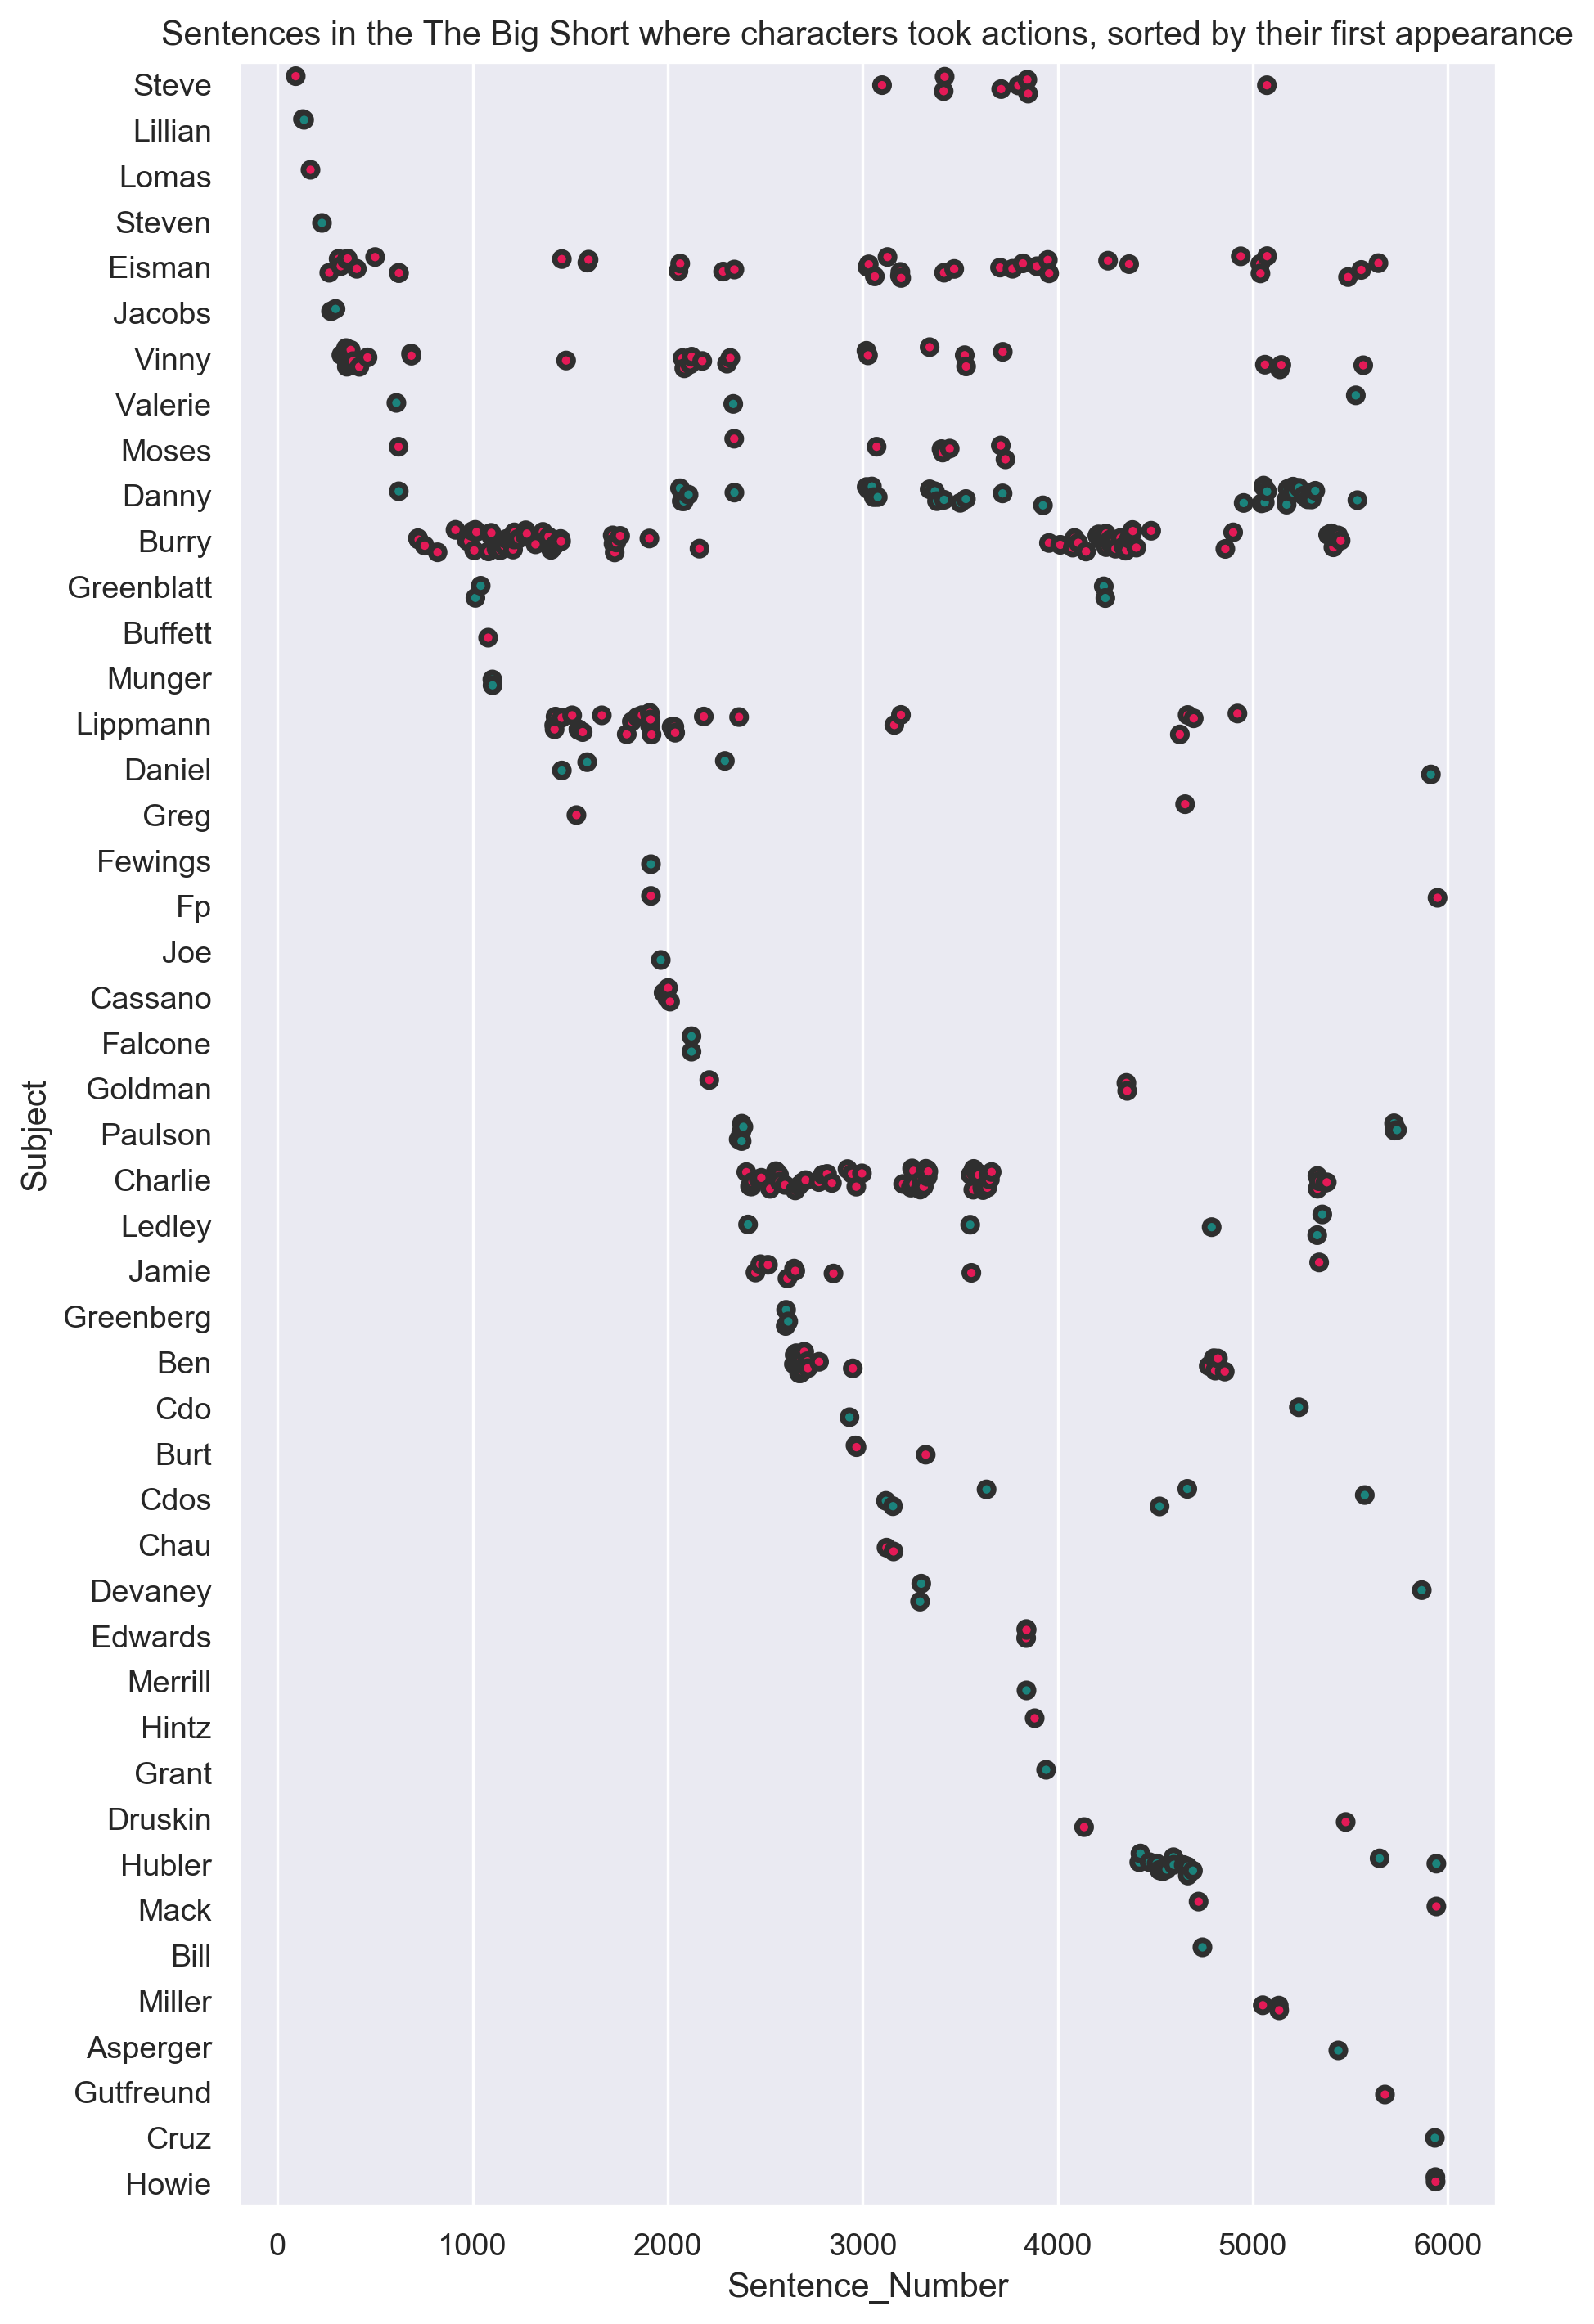

In [52]:
plt.action_plot(df_spans)

In [53]:
#Extract most common verbs and plot for all the Major characters --- Decide the Number of Top Verbs to extract/visualize
most_common_verbs = plt.most_common(df_spans, 5)

In [54]:
#Plot most common/top verbs used by specific characters
plt.xter_verbs_plot(df_spans, characters[0], 20, px.colors.cyclical.HSV)

In [56]:
#Plot most common/top verbs used by specific characters
plt.xter_verbs_plot(df_spans, characters[1], 20, px.colors.sequential.Magma)

In [57]:
#Plot most common/top verbs used by specific characters
plt.xter_verbs_plot(df_spans, characters[3], 20, px.colors.sequential.Magenta)

In [58]:
#Plot most common/top verbs used by specific characters
plt.xter_verbs_plot(df_spans, characters[4], 20, px.colors.diverging.PRGn)

### Summary:


- Spacy's NER (Named Entity Recognition) is not quite optimized for Entity extraction from Novels, as you observed there were a lot misclassification of entities that we had to use another technique to deal with, but still there were these error in classification still persisted.


- The next step will be to look at the sentences where specific characters were mentioned and perform various analyses on them such as Sentiment analysis, document similarity between different characters to compare and contrast, etc.,


- Also, these analyses could be useful for film adaptation, in the sense that it gives a screen writer a sense of the major characters (including the unamed narrator) that are needed for the movie if the novel is to be adapted.